In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt


#Imports excel spreadsheet file
df = pd.read_excel(io='C:\Users\User\Documents\Datasets\Online Retail.xlsx', sheet_name='Online Retail')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## Data Clean up

In [2]:
# Handling negative quantity

df = df.loc[df['Quantity'] > 0]

In [4]:
# Dropping NaN records

df = df[pd.notnull(df['CustomerID'])]

In [6]:
# Handling incomplete data
print('Date range: %s - %s' % (df['InvoiceDate'].min(), df['InvoiceDate'].max()))

Date range: 2010-12-01 08:26:00 - 2011-12-09 12:50:00


In [7]:
# drop incomplete month

df = df.loc[df['InvoiceDate'] < '2011-12-01']

In [8]:
# Total Sales Value

df['Sales'] = df['Quantity'] * df['UnitPrice']

In [9]:
# Summarise the data

orders_df = df.groupby(['CustomerID', 'InvoiceNo']).agg({
    'Sales': sum,
    'InvoiceDate': max
})

In [10]:
orders_df

Sales         InvoiceDate
CustomerID InvoiceNo                              
12346.0    541431     77183.60 2011-01-18 10:01:00
12347.0    537626       711.79 2010-12-07 14:57:00
           542237       475.39 2011-01-26 14:30:00
           549222       636.25 2011-04-07 10:43:00
           556201       382.52 2011-06-09 13:01:00
...                        ...                 ...
18283.0    578262       313.65 2011-11-23 13:27:00
           579673       223.61 2011-11-30 12:59:00
18287.0    554065       765.28 2011-05-22 10:39:00
           570715      1001.32 2011-10-12 10:23:00
           573167        70.68 2011-10-28 09:29:00

[17758 rows x 2 columns]

## Data Analysis

In [23]:
# Recency, Frequency and Total amount

def groupby_mean(x):
    return x.mean()

def groupby_count(x):
    return x.count()

def purchase_duration(x):
    return (x.max() - x.min()).days

def avg_frequency(x):
    return (x.max() - x.min()).days/x.count()

groupby_mean._name_ = 'avg'
groupby_count._name_ = 'count'
purchase_duration._name_ = 'purchase_duration'
avg_frequency._name_ = 'purchase_frequency'



In [32]:

summary_df = orders_df.groupby('CustomerID').agg({
    'Sales': [min, max, sum, groupby_mean, groupby_count],
    'InvoiceDate': [min, max, purchase_duration, avg_frequency]
}).reset_index()

In [31]:
print(orders_df.groupby('CustomerID').agg({
    'Sales': [min, max, sum, groupby_mean, groupby_count],
    'InvoiceDate': [min, max, purchase_duration, avg_frequency]
}).reset_index())

     CustomerID     Sales                                                  \
                      min       max       sum  groupby_mean groupby_count   
0       12346.0  77183.60  77183.60  77183.60  77183.600000             1   
1       12347.0    382.52   1294.32   4085.18    680.863333             6   
2       12348.0    227.44    892.80   1797.24    449.310000             4   
3       12349.0   1757.55   1757.55   1757.55   1757.550000             1   
4       12350.0    334.40    334.40    334.40    334.400000             1   
...         ...       ...       ...       ...           ...           ...   
4293    18280.0    180.60    180.60    180.60    180.600000             1   
4294    18281.0     80.82     80.82     80.82     80.820000             1   
4295    18282.0    100.21    100.21    100.21    100.210000             1   
4296    18283.0      1.95    313.65   1886.88    125.792000            15   
4297    18287.0     70.68   1001.32   1837.28    612.426667             3   

In [19]:
print(summary_df)

            s_a_l_e_s___m_i_n  s_a_l_e_s___m_a_x  s_a_l_e_s___s_u_m  \
CustomerID                                                            
12347.0                382.52            1294.32            4085.18   
12348.0                227.44             892.80            1797.24   
12352.0                120.33             840.30            2506.04   
12356.0                 58.35            2271.62            2811.43   
12359.0                547.50            2876.85            6372.58   
...                       ...                ...                ...   
18270.0                111.95             171.20             283.15   
18272.0                340.72             753.66            2710.70   
18273.0                 51.00             102.00             153.00   
18283.0                  1.95             313.65            1886.88   
18287.0                 70.68            1001.32            1837.28   

            s_a_l_e_s___g_r_o_u_p_b_y___m_e_a_n  \
CustomerID               

In [33]:
# Distribution of purchases

summary_df.columns = ['_'.join(col).lower() for col in summary_df.columns]
summary_df = summary_df.loc[summary_df['invoicedate_purchase_duration'] > 0]

summary_df

,customerid_,sales_min,sales_max,sales_sum,sales_groupby_mean,sales_groupby_count,invoicedate_min,invoicedate_max,invoicedate_purchase_duration,invoicedate_avg_frequency
1,12347.0,382.52,1294.32,4085.18,680.863333,6,2010-12-07 14:57:00,2011-10-31 12:25:00,327,54.500000
2,12348.0,227.44,892.80,1797.24,449.310000,4,2010-12-16 19:09:00,2011-09-25 13:13:00,282,70.500000
5,12352.0,120.33,840.30,2506.04,313.255000,8,2011-02-16 12:33:00,2011-11-03 14:37:00,260,32.500000
9,12356.0,58.35,2271.62,2811.43,937.143333,3,2011-01-18 09:50:00,2011-11-17 08:40:00,302,100.666667
12,12359.0,547.50,2876.85,6372.58,1593.145000,4,2011-01-12 12:43:00,2011-10-13 12:47:00,274,68.500000
...,...,...,...,...,...,...,...,...,...,...
4286,18270.0,111.95,171.20,283.15,141.575000,2,2011-03-18 12:41:00,2011-11-01 13:57:00,228,114.000000
4287,18272.0,340.72,753.66,2710.70,542.140000,5,2011-04-07 09:35:00,2011-10-25 11:52:00,201,40.200000
4288,18273.0,51.00,102.00,153.00,76.500000,2,2011-03-27 11:22:00,2011-09-05 11:27:00,162,81.000000
4296,18283.0,1.95,313.65,1886.88,125.792000,15,2011-01-06 14:14:00,2011-11-30 12:59:00,327,21.800000


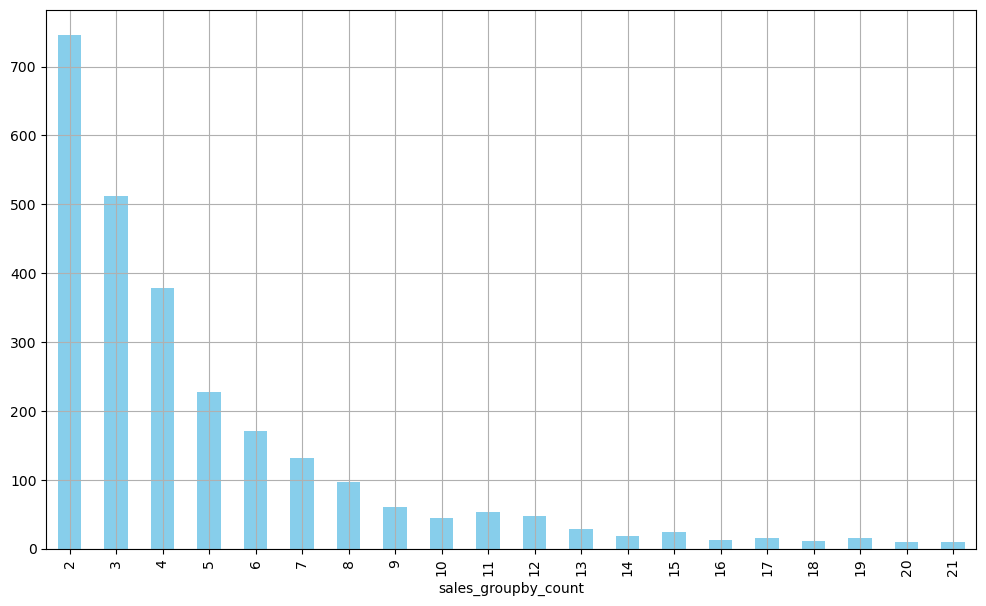

In [35]:
# Number of purchases customers have made distribution

ax = summary_df.groupby('sales_groupby_count').count()['sales_groupby_mean'][:20].plot(
    kind='bar',
    color='skyblue',
    figsize = (12,7),
    grid = True
)

ax.set_label('count')

plt.show()

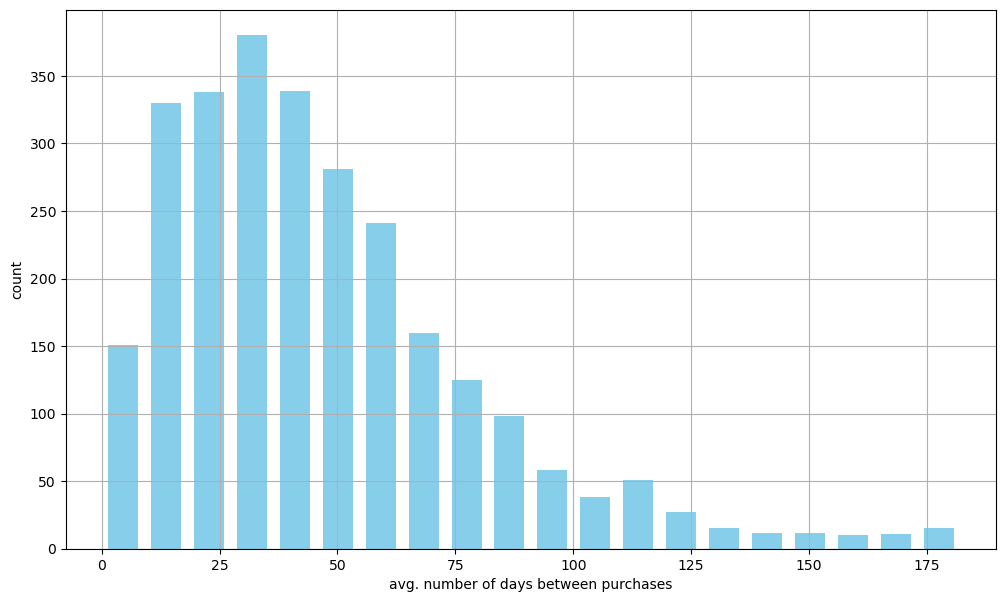

In [39]:
# Distribution of number of days between purchase

ax = summary_df['invoicedate_avg_frequency'].hist(
    bins=20,
    color='skyblue',
    rwidth=0.7,
    figsize=(12,7))

ax.set_xlabel('avg. number of days between purchases')
ax.set_ylabel('count')

plt.show()

# Predicting the 3 month CLV

## Data preparation

In [40]:
# prepare data for a model

clv_freq = '3M'

data_df = orders_df.reset_index().groupby([
    'CustomerID',
    pd.Grouper(key='InvoiceDate', freq=clv_freq)
]).agg({'Sales': [sum, groupby_mean, groupby_count]})

data_df.columns = ['_'.join(col).lower() for col in data_df.columns]
data_df = data_df.reset_index()

In [41]:
data_df.head()

,CustomerID,InvoiceDate,sales_sum,sales_groupby_mean,sales_groupby_count
0,12346.0,2011-03-31,77183.60,77183.600,1
1,12347.0,2010-12-31,711.79,711.790,1
2,12347.0,2011-03-31,475.39,475.390,1
3,12347.0,2011-06-30,1018.77,509.385,2
4,12347.0,2011-09-30,584.91,584.910,1


In [48]:
# Make invoicedate columns easier to read adds month numbers

date_month_map = {
    str(x)[:10]: 'M_%s' % (i+1) for i, x in enumerate(
        sorted(data_df.reset_index()['InvoiceDate'].unique(), reverse=True))
}

data_df['M'] = data_df['InvoiceDate'].apply(lambda x: date_month_map[str(x)[:10]])

In [52]:
data_df['M']

0       M_4
1       M_5
2       M_4
3       M_3
4       M_2
       ... 
9215    M_3
9216    M_2
9217    M_1
9218    M_3
9219    M_1
Name: M, Length: 9220, dtype: object

In [54]:
# Transform data into tabular data - rows represent individual customers

features_df = pd.pivot_table(
    data_df.loc[data_df['M'] != 'M-1'],
    values=['sales_sum', 'sales_groupby_mean', 'sales_groupby_count'],
    columns = 'M',
    index='CustomerID'
)

features_df.columns = ['_'.join(col) for col in features_df.columns]

features_df

,sales_groupby_count_M_1,sales_groupby_count_M_2,sales_groupby_count_M_3,sales_groupby_count_M_4,sales_groupby_count_M_5,sales_groupby_mean_M_1,sales_groupby_mean_M_2,sales_groupby_mean_M_3,sales_groupby_mean_M_4,sales_groupby_mean_M_5,sales_sum_M_1,sales_sum_M_2,sales_sum_M_3,sales_sum_M_4,sales_sum_M_5
CustomerID,,,,,,,,,,,,,,,
12346.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,77183.600000,NaN,NaN,NaN,NaN,77183.60,NaN
12347.0,1.0,1.0,2.0,1.0,1.0,1294.320,584.910000,509.385,475.390000,711.79,1294.32,584.91,1018.77,475.39,711.79
12348.0,NaN,1.0,1.0,1.0,1.0,NaN,310.000000,367.000,227.440000,892.80,NaN,310.00,367.00,227.44,892.80
12349.0,1.0,NaN,NaN,NaN,NaN,1757.550,NaN,NaN,NaN,NaN,1757.55,NaN,NaN,NaN,NaN
12350.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,334.400000,NaN,NaN,NaN,NaN,334.40,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18280.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,180.600000,NaN,NaN,NaN,NaN,180.60,NaN
18281.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,80.820,NaN,NaN,NaN,NaN,80.82,NaN,NaN
18282.0,NaN,1.0,NaN,NaN,NaN,NaN,100.210000,NaN,NaN,NaN,NaN,100.21,NaN,NaN,NaN


In [55]:
# encode nulls with zeros

features_df = features_df.fillna(0)

In [56]:
# Build the target variables

response_df = data_df.loc[
    data_df['M'] == 'M_1',
    ['CustomerID', 'sales_sum']
]

response_df.columns = ['CustomerID', 'CLV_'+clv_freq]

In [58]:
response_df.head()

,CustomerID,CLV_3M
5,12347.0,1294.32
10,12349.0,1757.55
14,12352.0,311.73
20,12356.0,58.35
21,12357.0,6207.67


In [59]:
# sample set for machine learning model

sample_set_df = features_df.merge(
    response_df,
    left_index=True,
    right_on='CustomerID',
    how='left'
)

sample_set_df = sample_set_df.fillna(0) 

In [60]:
sample_set_df.head()

,sales_groupby_count_M_1,sales_groupby_count_M_2,sales_groupby_count_M_3,sales_groupby_count_M_4,sales_groupby_count_M_5,sales_groupby_mean_M_1,sales_groupby_mean_M_2,sales_groupby_mean_M_3,sales_groupby_mean_M_4,sales_groupby_mean_M_5,sales_sum_M_1,sales_sum_M_2,sales_sum_M_3,sales_sum_M_4,sales_sum_M_5,CustomerID,CLV_3M
NaN,0.0,0.0,0.0,1.0,0.0,0.00,0.00,0.000,77183.60,0.00,0.00,0.00,0.00,77183.60,0.00,12346.0,0.00
5.0,1.0,1.0,2.0,1.0,1.0,1294.32,584.91,509.385,475.39,711.79,1294.32,584.91,1018.77,475.39,711.79,12347.0,1294.32
NaN,0.0,1.0,1.0,1.0,1.0,0.00,310.00,367.000,227.44,892.80,0.00,310.00,367.00,227.44,892.80,12348.0,0.00
10.0,1.0,0.0,0.0,0.0,0.0,1757.55,0.00,0.000,0.00,0.00,1757.55,0.00,0.00,0.00,0.00,12349.0,1757.55
NaN,0.0,0.0,0.0,1.0,0.0,0.00,0.00,0.000,334.40,0.00,0.00,0.00,0.00,334.40,0.00,12350.0,0.00


## Linear regression

In [61]:
# Prepare the target and test groups

from sklearn.model_selection import train_test_split

In [84]:
# Sample collections

target_var = 'CLV_'+clv_freq
all_features = [x for x in sample_set_df.columns if x not in ['CustomerID', target_var]]



In [93]:
x_train, x_test, y_train, y_test = train_test_split(
    sample_set_df[all_features],
    sample_set_df[target_var],
    test_size=0.3
)

In [94]:
# train the model 

from sklearn.linear_model import LinearRegression

reg_fit = LinearRegression()



In [95]:
reg_fit.fit(x_train, y_train)

LinearRegression()

In [96]:
# check the intercept of the regression line

reg_fit.intercept_

7.958078640513122e-13

In [97]:
# check the fitted line coeffeicients

reg_fit.coef_

array([ 3.19604264e-13, -2.45413982e-13, -9.09850126e-14, -5.60359571e-14,
        1.39117368e-13, -8.83658645e-16, -3.42936942e-16, -8.88636508e-16,
        4.75718369e-16,  6.72580461e-16,  1.00000000e+00, -5.08381030e-16,
       -1.60002342e-16, -6.81981353e-16, -2.08308247e-16])

In [98]:
# check the fitted line coeffeicients in a dataframe

coef = pd.DataFrame(list(zip(all_features, reg_fit.coef_)))
coef.columns = ['feature', 'coef']

coef

,feature,coef
0,sales_groupby_count_M_1,3.196043e-13
1,sales_groupby_count_M_2,-2.454140e-13
2,sales_groupby_count_M_3,-9.098501e-14
3,sales_groupby_count_M_4,-5.603596e-14
4,sales_groupby_count_M_5,1.391174e-13
5,sales_groupby_mean_M_1,-8.836586e-16
6,sales_groupby_mean_M_2,-3.429369e-16
7,sales_groupby_mean_M_3,-8.886365e-16
8,sales_groupby_mean_M_4,4.757184e-16
9,sales_groupby_mean_M_5,6.725805e-16


## Evaluating Regression Model Performance

In [89]:
# Using the R2, MAE and scatterplot
from sklearn.metrics import r2_score, median_absolute_error

# Prediction output

train_preds = reg_fit.predict(x_train)
test_preds = reg_fit.predict(x_test)

#r2_score(y_true=y_train, y_pred=train_preds)
#median_absolute_error(y_true=y_train, y_pred=train_preds)


### R-Squared

In [99]:
print('In-Sample R-Squared: %0.4f' % r2_score(y_true=y_train, y_pred=train_preds))
print('Out-Of-Sample R-Squared: %0.4f' %r2_score(y_true=y_test, y_pred=test_preds) )

In-Sample R-Squared: -0.7686
Out-Of-Sample R-Squared: -1.3870


### Median Absolute Error

In [100]:
print('In-Sample MSE: %0.4f' % median_absolute_error(y_true=y_train, y_pred=train_preds))
print('Out-Of-Sample MSE: %0.4f' % median_absolute_error(y_true=y_test, y_pred=test_preds))

In-Sample MSE: 306.3600
Out-Of-Sample MSE: 315.0400


AttributeError: 'Line2D' object has no property 'linestylye'

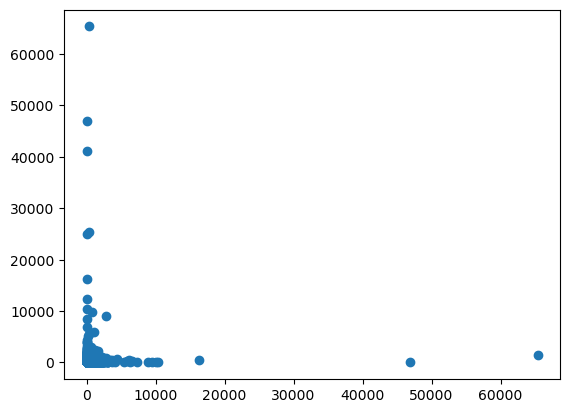

In [102]:
# Plot these to see how far points are from the line

plt.scatter(y_test, test_preds)
plt.plot([0, max(y_test)], [0,max(test_preds)], color='gray', lw=1, linestylye ='--')

plt.xlabel('actual')
plt.ylabel('predicted')
plt.title('Out-of-Sample Actual vs Predicted')
plt.grid()

plt.show()